# **Take Home Exercise**: Web Scraping, Pandas, & Basic Statistic

<hr>

In [1]:
# from bs4 import BeautifulSoup
# import requests
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import math

**Optional: Scrape data from this site: https://scrapethissite.com/pages/simple/**










In [2]:

# url='https://scrapethissite.com/pages/simple/'
# data= requests.get(url)
# data=BeautifulSoup(data.content,'html.parser')

**Optional: Simpan data ke dalam DataFrame (**df_countries**) dengan nama kolom ``Country Name, Capital, Population, & Area (km2)``!**


In [3]:
# negara=data.find_all('h3')
# negara1=[negara[i].text for i in range (len(negara))]
# negara2=[negara1[i].replace('\n\n                            ','') for i in range (len(negara))]
# negara3=[negara2[i].replace('\n                        ','') for i in range (len(negara))]


In [4]:
# ibukota=data.find_all("span", class_='country-capital')
# ibukota1=[ibukota[i].text for i in range(len (ibukota))]


In [5]:
# populasi=data.find_all("span", class_='country-population')
# populasi1=[int(populasi[i].text) for i in range(len(populasi))]


In [6]:
# area=data.find_all("span", class_='country-area')
# area1=[float(area[i].text) for i in range(len(area))]



In [7]:
# df_countries= pd.DataFrame(list(zip(negara3,ibukota1,populasi1,area1)),columns=['Country Name', 'Capital', 'Population', 'Area (km2)'])


In [8]:
# df_countries.to_csv('Countries.csv')

In [9]:
df_countries = pd.read_csv('Countries.csv')
df_countries.head()

,Country Name,Capital,Population,Area (km2)
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0


In [10]:
df_countries.isna().sum()

Country Name    0
Capital         0
Population      0
Area (km2)      0
dtype: int64

**1. Simpan file CSV Countries ke dalam df_countries. Cek 5 data pertama.**

,Country Name,Capital,Population,Area (km2)
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0


In [11]:
df_countries = pd.read_csv('Countries.csv')
df_countries.head()

,Country Name,Capital,Population,Area (km2)
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0


#### 2. Sebutkan 5 negara dengan jumlah ``populasi terkecil``!


,Country Name,Population
89,South Georgia and the South Sandwich Islands,30
180,Pitcairn Islands,46
215,French Southern Territories,140
38,Cocos [Keeling] Islands,628
235,Vatican City,921


In [12]:
df_countries.loc[df_countries['Population']>0,['Country Name','Population']].sort_values('Population').head()

,Country Name,Population
89,South Georgia and the South Sandwich Islands,30
180,Pitcairn Islands,46
215,French Southern Territories,140
38,Cocos [Keeling] Islands,628
235,Vatican City,921


#### 3. Sebutkan 5 negara dengan ``luas area terbesar``!


,Country Name,Area (km2)
190,Russia,17100000.0
8,Antarctica,14000000.0
37,Canada,9984670.0
232,United States,9629091.0
47,China,9596960.0


In [13]:
df_countries.loc[:,['Country Name','Area (km2)']].sort_values(by='Area (km2)', ascending=False).head()

,Country Name,Area (km2)
190,Russia,17100000.0
8,Antarctica,14000000.0
37,Canada,9984670.0
232,United States,9629091.0
47,China,9596960.0


#### 4. Sebutkan 5 negara dengan ``nama negara terpanjang`` (jumlah karakter tanpa spasi)!


,Country Name,Panjang Nama
89,South Georgia and the South Sandwich Islands,38
95,Heard Island and McDonald Islands,29
39,Democratic Republic of the Congo,28
236,Saint Vincent and the Grenadines,28
105,British Indian Ocean Territory,27


In [14]:
lenNama=[]
for i in df_countries['Country Name']:
    i = i.replace(' ','')
    lenNama.append(len(i))
    
df_countries['Panjang Nama'] = lenNama
df_countries.head()

,Country Name,Capital,Population,Area (km2),Panjang Nama
0,Andorra,Andorra la Vella,84000,468.0,7
1,United Arab Emirates,Abu Dhabi,4975593,82880.0,18
2,Afghanistan,Kabul,29121286,647500.0,11
3,Antigua and Barbuda,St. John's,86754,443.0,17
4,Anguilla,The Valley,13254,102.0,8


In [15]:
# cara lain

# df_countries['Panjang Nama'] = df_countries['Country Name'].str.len() - df_countries['Country Name'].str.count(' ')

In [16]:
# cara lain

# df_countries['Panjang Nama'] = df_countries['Country Name'].str.replace(' ', '').apply(len)

In [17]:
df_countries.loc[:,['Country Name','Panjang Nama']].sort_values(by='Panjang Nama', ascending=False).head()

,Country Name,Panjang Nama
89,South Georgia and the South Sandwich Islands,38
95,Heard Island and McDonald Islands,29
39,Democratic Republic of the Congo,28
236,Saint Vincent and the Grenadines,28
105,British Indian Ocean Territory,27


#### 5. Sebutkan 5 negara dengan ``nama capital/ibukota terpendek`` (jumlah karakter tanpa spasi)!

,Country Name,Capital,Panjang Nama Ibukota
27,Brunei,Bandar Seri Begawan,17
215,French Southern Territories,Port-aux-Français,17
65,Western Sahara,Laâyoune / El Aaiún,16
239,U.S. Virgin Islands,Charlotte Amalie,15
0,Andorra,Andorra la Vella,14


In [18]:
lenCapital=[]
for i in df_countries['Capital']:
    i = i.replace(' ','')
    lenCapital.append(len(i))
    
df_countries['Panjang Nama Ibu Kota'] = lenCapital
df_countries.head()

,Country Name,Capital,Population,Area (km2),Panjang Nama,Panjang Nama Ibu Kota
0,Andorra,Andorra la Vella,84000,468.0,7,14
1,United Arab Emirates,Abu Dhabi,4975593,82880.0,18,8
2,Afghanistan,Kabul,29121286,647500.0,11,5
3,Antigua and Barbuda,St. John's,86754,443.0,17,9
4,Anguilla,The Valley,13254,102.0,8,9


In [19]:
df_countries.loc[df_countries['Capital']!='None',['Country Name','Capital','Panjang Nama Ibu Kota']].sort_values(by='Panjang Nama Ibu Kota', ascending=True).head()

,Country Name,Capital,Panjang Nama Ibu Kota
70,Fiji,Suva,4
207,South Sudan,Juba,4
216,Togo,Lomé,4
134,Latvia,Riga,4
154,Maldives,Malé,4


#### 6. Apakah ada korelasi antara ``panjang nama negara`` dengan ``nama ibukota`` (jumlah karakter tanpa spasi)!

NormaltestResult(statistic=132.78191157761543, pvalue=1.468162924490796e-29)

In [20]:
print(stats.normaltest(df_countries['Panjang Nama']))


NormaltestResult(statistic=132.78191157761543, pvalue=1.468162924490796e-29)


0.2124675982763955

In [21]:
# karena pvalue<0.05 (1.4*10**-29), maka reject H-0, berarti distribusi tidak normal, jadi menggunakan metode spearman

df_countries['Panjang Nama'].corr(df_countries['Panjang Nama Ibu Kota'], method='spearman')

# hasil dari correlation bernilai 0.21 (0--0.4) artinya tidak ada korelasi

0.21246759827639547

In [22]:
df_countries['Panjang Nama'].corr(df_countries['Panjang Nama Ibu Kota'], method='pearson')

0.19275291065687025

In [23]:
df_countries['Panjang Nama'].corr(df_countries['Panjang Nama Ibu Kota'], method='kendall')

0.16150101238421788

#### 7. Berapa nilai mean dan median pada kolom ``populasi`` dan ``luas area``?

mean populasi= 27445675.58
median populasi= 4288138.5
mean area= 599636.91876
median area= 64894.5


In [24]:
print('mean populasi = ', df_countries['Population'].mean())
print('median populasi = ', df_countries['Population'].median())
print('mean area = ', df_countries['Area (km2)'].mean())
print('median area = ', df_countries['Area (km2)'].median())

mean populasi =  27445675.58
median populasi =  4288138.5
mean area =  599636.91876
median area =  64894.5


In [50]:
df_countries.describe().loc[['mean','50%'],['Population','Area (km2)']]

,Population,Area (km2)
mean,27445675.58,599636.91876
50%,4288138.50,64894.50000


#### 8. Berapa nilai ``standart deviasi`` pada kolom populasi? Apakah negara Denmark berada di 1 kali Standart Deviasi dari mean?

StDev populasi= 116862570.28763732
144308245.86763734


58    True
Name: Population, dtype: bool

In [26]:
print('StDev populasi=', df_countries['Population'].std())

StDev populasi= 116862570.28763732


In [27]:
stdPop = df_countries['Population'].std()
print(f'StDev populasi= {stdPop}')

StDev populasi= 116862570.28763732


In [28]:
df_countries.loc[df_countries['Country Name']=='Denmark','Population']

58    5484000
Name: Population, dtype: int64

In [29]:
popDenmark = df_countries.loc[df_countries['Country Name']=='Denmark','Population']
popDenmark

58    5484000
Name: Population, dtype: int64

In [30]:
# ini kalo membuat kolom baru
stdOnceUp = df_countries['Population'].mean() + df_countries['Population'].std() 
stdOnceDown = df_countries['Population'].mean() - df_countries['Population'].std()

stdOnce = [True if i<stdOnceUp or i>stdOnceDown else False for i in df_countries['Population']]

df_countries['Once std'] = stdOnce

df_countries.loc[df_countries['Country Name']=='Denmark', 'Once std']

58    True
Name: Once std, dtype: bool

In [53]:
# ini langsung, cara panjang
df_countries.loc[df_countries['Country Name']=='Denmark','Population'] < (df_countries['Population'].mean()) + (df_countries['Population'].std())

58    True
Name: Population, dtype: bool

In [54]:
# ini langsung, cara singkat, karena sudah disimpan di dalam variabel
popDenmark < stdOnceUp

58    True
Name: Population, dtype: bool

#### 9. Sebutkan 5 negara dengan ``kepadatan penduduk tertinggi`` (populasi/luas area) !  

,Country Name,Kepadatan Penduduk
137,Monaco,16905.128205
197,Singapore,6786.587267
94,Hong Kong,6317.478022
82,Gibraltar,4289.846154
235,Vatican City,2093.181818


In [31]:
popDensity = df_countries['Population'] / df_countries['Area (km2)']
df_countries['Kepadatan Penduduk'] = popDensity

df_countries.loc[:,['Country Name','Kepadatan Penduduk']].sort_values(by='Kepadatan Penduduk', ascending=False).head()

,Country Name,Kepadatan Penduduk
137,Monaco,16905.128205
197,Singapore,6786.587267
94,Hong Kong,6317.478022
82,Gibraltar,4289.846154
235,Vatican City,2093.181818


#### 10. Apakah ada korelasi ``panjang nama negara`` dengan kepadatan penduduk?

-0.052390002954537

In [32]:
print(stats.normaltest(df_countries['Panjang Nama']))
print(stats.normaltest(df_countries['Kepadatan Penduduk']))

NormaltestResult(statistic=132.78191157761543, pvalue=1.468162924490796e-29)
NormaltestResult(statistic=nan, pvalue=nan)


In [33]:
df_countries['Panjang Nama'].corr(df_countries['Kepadatan Penduduk']) # pearson

-0.057366416734344935

In [34]:
df_countries['Panjang Nama'].corr(df_countries['Kepadatan Penduduk'], method='spearman') # spearman, gunakan metode ini karena distribusi tidak normal, pvalue<0.05, reject H-0

# hasil korelasinya -0.05 (0--0.4) artinya antara 2 kolom ini tidak berhubungan

-0.052390002954537

In [35]:
df_countries['Panjang Nama'].corr(df_countries['Kepadatan Penduduk'], method='kendall') # kendall

-0.03699582448627743

#### 11. Apakah feature/kolom populasi, area, panjang nama negara, dan panjang nama ibukota (capital) ``terdistribusi normal``?

In [36]:
print(stats.normaltest(df_countries['Population']))
print(stats.normaltest(df_countries['Area (km2)']))
print(stats.normaltest(df_countries['Panjang Nama']))
print(stats.normaltest(df_countries['Panjang Nama Ibu Kota']))

NormaltestResult(statistic=435.2858874343729, pvalue=3.012107853549413e-95)
NormaltestResult(statistic=318.3298489109781, pvalue=7.508472533626339e-70)
NormaltestResult(statistic=132.78191157761543, pvalue=1.468162924490796e-29)
NormaltestResult(statistic=32.83211576304163, pvalue=7.423293765813014e-08)


In [37]:
# pvalue semuanya < 0.05, reject H-0, distribusi tidak normal

#### 12. Buatlah DataFrame baru yang menghitung ``rata-rata populasi`` negara dengan ``awalan huruf`` A, B, C, D, E, F, ..., Z!

awal
A    1.082743e+07
B    1.995592e+07
C    7.554481e+07
D    1.740752e+07
E    2.482273e+07
Name: Population, dtype: float64

In [38]:
first = [i[0] for i in df_countries['Country Name']] # mengambil dari indexing huruf pertama
df_countries['First'] = first

df_countries.groupby('First').mean()['Population'].head()

First
A    1.082743e+07
B    1.995592e+07
C    7.554481e+07
D    1.740752e+07
E    2.482273e+07
Name: Population, dtype: float64

In [55]:
#  CARA apply lambda

df_countries['First'] = df_countries['Country Name'].apply(lambda x:x[0])
df_countries.groupby('First').mean()['Population'].head()

First
A    1.082743e+07
B    1.995592e+07
C    7.554481e+07
D    1.740752e+07
E    2.482273e+07
Name: Population, dtype: float64

#### 13. Negara dengan ``awalan huruf`` apa yang memiliki rata-rata ``populasi terbesar dan terkecil``?

awal
Å    26711.0
Name: Population, dtype: float64
awal
I    161643125.2
Name: Population, dtype: float64


In [39]:

groupFirst = df_countries.groupby('First').mean().loc[:,['Population']] # buat dataframe baru 

maxPop = df_countries.groupby('First').mean()['Population'].max()
minPop = df_countries.groupby('First').mean()['Population'].min()

print(groupFirst.loc[groupFirst['Population']==minPop,'Population'])
print(groupFirst.loc[groupFirst['Population']==maxPop,'Population'])

First
Å    26711.0
Name: Population, dtype: float64
First
I    161643125.2
Name: Population, dtype: float64


In [58]:
# groupFirst.sort_values().tail(1)
groupFirst.head()

,Population
First,
A,1.082743e+07
B,1.995592e+07
C,7.554481e+07
D,1.740752e+07
E,2.482273e+07


In [73]:
dfBaru = df_countries.groupby('First', as_index=False).mean()[['First','Population']]
dfBaru.head()

,First,Population
0,A,1.082743e+07
1,B,1.995592e+07
2,C,7.554481e+07
3,D,1.740752e+07
4,E,2.482273e+07


In [71]:
print(dfBaru.sort_values(by='Population').head(1))
print(dfBaru.sort_values(by='Population').tail(1))

   First  Population
25     Å     26711.0
  First   Population
8     I  161643125.2


#### 14. Di antara ``luas area, panjang nama negara, dan panjang nama ibukota``, kolom/feature apa yang memiliki korelasi kuat terhadap populasi?

Population              1.000000
Area (km2)              0.831067
Panjang Nama           -0.329573
Panjang Nama Ibukota   -0.194517
Kepadatan Penduduk     -0.030759
dtype: float64

In [62]:
df_countries.corr(method='spearman')['Population']

# Area (km2) memiliki korelasi paling dekar dgn populasi

Population               1.000000
Area (km2)               0.831067
Panjang Nama            -0.329573
Panjang Nama Ibu Kota   -0.194517
Once std                      NaN
Kepadatan Penduduk      -0.030759
Name: Population, dtype: float64

In [74]:
(df_countries).corrwith(df_countries['Population'])

AttributeError: 'float' object has no attribute 'shape'

# ``Great Job``

# Visualisasi
### Buat Boxplot dan Histogram untuk data population, area, and population density

In [41]:
df_countries.head()

,Country Name,Capital,Population,Area (km2),Panjang Nama,Panjang Nama Ibu Kota,Once std,Kepadatan Penduduk,First
0,Andorra,Andorra la Vella,84000,468.0,7,14,True,179.487179,A
1,United Arab Emirates,Abu Dhabi,4975593,82880.0,18,8,True,60.033699,U
2,Afghanistan,Kabul,29121286,647500.0,11,5,True,44.974959,A
3,Antigua and Barbuda,St. John's,86754,443.0,17,9,True,195.832957,A
4,Anguilla,The Valley,13254,102.0,8,9,True,129.941176,A


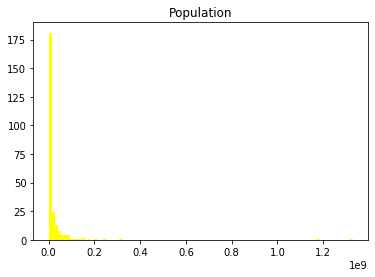

In [42]:
plt.hist(df_countries['Population'], bins=100, color='yellow')
plt.title('Population')
plt.show()

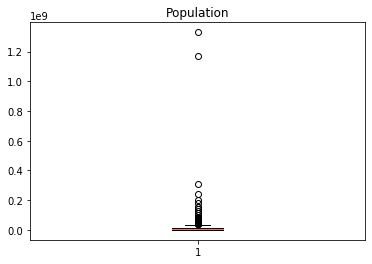

In [43]:
plt.boxplot(df_countries['Population'])
plt.title('Population')
plt.show()

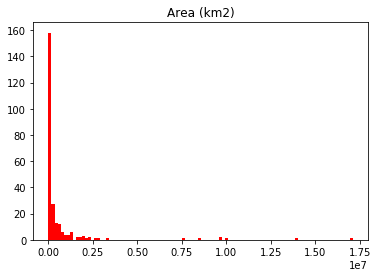

In [44]:
plt.hist(df_countries['Area (km2)'], bins=100, color='red')
plt.title('Area (km2)')
plt.show()

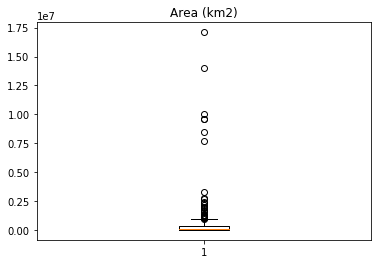

In [45]:
plt.boxplot(df_countries['Area (km2)'])
plt.title('Area (km2)')
plt.show()

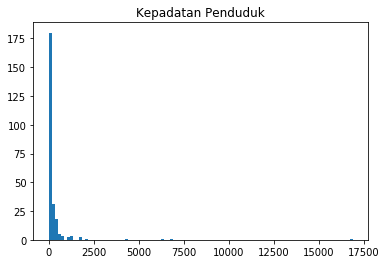

In [46]:
plt.hist(df_countries['Kepadatan Penduduk'], bins=100)
plt.title('Kepadatan Penduduk')
plt.show()

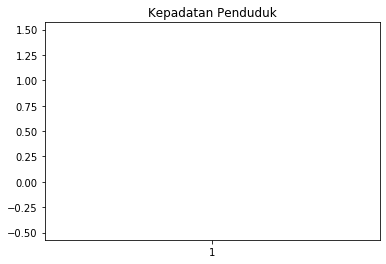

In [47]:
plt.boxplot(df_countries['Kepadatan Penduduk'])
plt.title('Kepadatan Penduduk')
plt.show()

### Buat visualisasi untuk korelasi antara area dan populasi

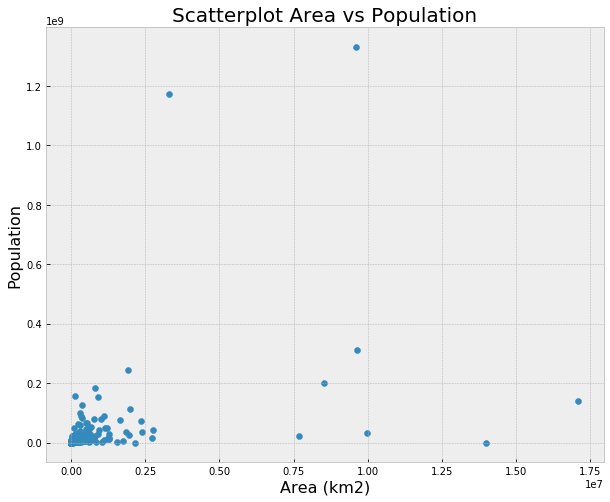

In [48]:
plt.figure(figsize=(10,8))
plt.style.use('bmh')
plt.scatter(x= df_countries['Area (km2)'], y= df_countries['Population'])
plt.title('Scatterplot Area vs Population', fontsize=20)
plt.xlabel('Area (km2)', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.show()

### Bonus: Buat heatmap seperti berikut

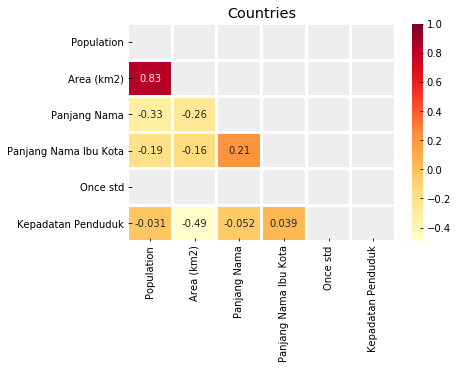

In [77]:
# membuat mask, agar yg ditampilkan ga dobel2
mask = np.zeros_like(df_countries.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_countries.corr(method='spearman'), annot=True, linewidths=2, cmap='YlOrRd', mask=mask)
# annot : kasih angka di dlm kotak
# linewidths : garis pemisah antar kotak
# cmap : style warna
plt.title('Countries')
plt.show()